<h1 align="center">1-D Heat Equation</h1>

## Summary:

    This notebook is designed to help you start solving PDEs in Python touching following topics:
- **[1-D heat equation](https://en.wikipedia.org/wiki/Heat_equation) with [Drichlet](https://en.wikipedia.org/wiki/Peter_Gustav_Lejeune_Dirichlet) BCs** 
- **Forward Euler method** 
- **Plotting and [Animation](https://jakevdp.github.io/blog/2013/05/19/a-javascript-viewer-for-matplotlib-animations/)**

## 1. 1-D heat equation with Drichlet bcs

Equation:

$$ {\large
\begin{equation}
u_t = \alpha u_{xx} \quad \text{for} \quad 0 \leq x \leq L \quad\text{and}\quad 0 \leq t \leq T
\end{equation}
}
$$

Boundary conditions:

$$ {\large
\begin{equation}
u(t,0)=0, \quad\text{and}\quad u(t,0)=0
\end{equation}
}
$$

Initial condition:
$$ {\large
\begin{equation}
u(0,x)=f(x)
\end{equation}
}
$$

Assumptions:
$$ {\large
\begin{equation}
L=1{\text{[m]}}
\end{equation}
}
$$

$$ {\large
\begin{equation}
f(x)=\sin(2\pi x)+0.1\sin(20\pi x)
\end{equation}
}
$$

### Packages:

In [1]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
# produce the plot inside notebook
matplotlib.rc(r'xtick', labelsize=25) 
matplotlib.rc(r'ytick', labelsize=25) 
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 35}
matplotlib.rc('font', **font)
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'

### Let's plot the IC:

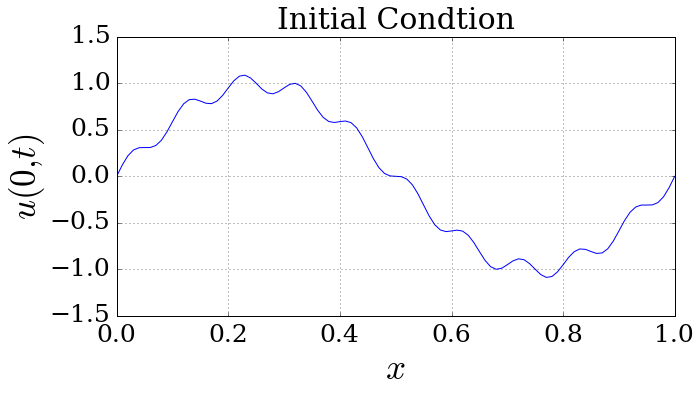

In [2]:
# Defining x
L = 1
nx = 100
x = np.linspace(0, L, nx + 1)

# Creating u(0, t) as u0
u0 = np.sin(2 * np.pi * x) + 0.1 * np.sin( 20 * np.pi * x)

# Plot the IC
fig01 = plt.figure(1, figsize=(10, 5), dpi=90)
ax01 = fig01.add_subplot(1,1,1)
ax01.plot(x, u0)
ax01.grid('on')


ax01.set_title("Initial Condtion", fontsize=30, y=1.01)
ax01.set_xlabel(r'$x$', fontsize=35)
ax01.set_ylabel(r'$u(0,t)$', fontsize=35)

plt.show()

## Numerical method (Forward Euler):


- ** First order forward difference in time **
- ** Second order central difference in space**
$$
{\large
\begin{equation}
\frac{u^{n+1}_i-u^{n}_i}{\Delta t} = \alpha\frac{u^{n}_{i+1}-2u^{n}_{i+}+u^{n}_{i-1}}{\Delta x ^2}
\end{equation}
}
$$

        i.e. 
$$
{\large
\begin{equation}
u^{n+1}_i= u^{n}_i + C\big(u^{n}_{i+1}-2u^{n}_{i+}+u^{n}_{i-1}\big)\quad \text{with} \quad C=\frac{\alpha \Delta t}{\Delta x ^2}
\end{equation}
}
$$

### Let's solve the problem:

In [3]:
# Spatial mesh
L = 1
Nx = 100
x = np.linspace(0, L, Nx + 1)
dx = x[1] - x[0]

#  Thermal diffusivity of Gold = 1.27 * 10 ** -4
alpha = 1.27 * 10 ** -4
#  Thermal diffusivity of Iron = 2.3 * 10  ** -5
# alpha = 2.3 * 10 ** -5

# Temporal mesh
T = 700
Nt = 2000
t = np.linspace(0, T, Nt+1)    # mesh points in time
dt = t[1] - t[0]
C = alpha * dt / dx**2

print "T, dx, dt, C =  %f, %f, %f, %f" % (T, dx, dt, C)

# IC 
u = np.sin(2 * np.pi * x) + 0.1 * np.sin(20 * np.pi * x)

u_sol = []
for n in range(Nt):
    un = u.copy()
    u_sol.append(un)
    # Solving the problem everywhere except at the boundaries
    for i in range(1, Nx):
        u[i] = un[i] + C * (un[i + 1] - 2 * un[i] + un[i - 1])
    # Adding the boundary values
    u[0] = 0
    u[Nx] = 0
print "size of the solution is:", len(u_sol), "*", len(u_sol[0])

T, dx, dt, C =  700.000000, 0.010000, 0.350000, 0.444500
size of the solution is: 2000 * 101


### Downsampling the results for plotting reasons:

In [4]:
# spatial downsampling
spatial_downsampling_amount = 1 # not actually done since it makes things look very coarse
x_d = x[::spatial_downsampling_amount]
u_sol_d = [u_sol_i[::spatial_downsampling_amount] for u_sol_i in u_sol]

# temporal downsampling
temporal_downsampling_threshold = 0.01 # lower number means more points (less downsampling)

u_sol_DS = [u_sol_d[0]]
# timestamps of picked solution arrays these can be overlaid on the plot to show at what point we are
times = [0]
for time, sol_array in enumerate(u_sol_d):
    if np.sum((sol_array - u_sol_DS[-1])**2) > temporal_downsampling_threshold:
        u_sol_DS.append(sol_array)
        times.append(time)

### Analytical solution:

$${\large
\begin{equation}
u(x,t)=e^{−4\pi^2t} \sin(2\pi x) + 0.1e^{−20^2\pi^2t}\sin(20\pi x)
\end{equation}
}
$$

### Let's generate the analytical solution over our spatial and temporal mesh:

In [5]:
# Spatial mesh
L = 1
Nx = 100
x = np.linspace(0, L, Nx + 1)

# Temporal mesh
T = 700
Nt = 2000
t = np.linspace(0, T, Nt+1)    # mesh points in time
dt = t[1] - t[0]

#  Thermal diffusivity of Gold = 1.27 * 10 ** -4
alpha = 1.27 * 10 ** -4

# IC 
u = np.sin(2 * np.pi * x) + 0.1 * np.sin(20 * np.pi * x)

u_a = []  # Analytical Solution

for n in times:
    t = n * dt
    un = u.copy()
    u_a.append(un)
    u = np.exp(-alpha * (2 * np.pi) ** 2 * t
              ) *  np.sin(2 * np.pi * x) + 0.1 * np.exp(-alpha * (20 * np.pi) ** 2 * t
                                                       )* np.sin(20 * np.pi * x) 

## Let's create an animation using JSAnimation:

In [6]:
from JSAnimation import IPython_display
from matplotlib import animation


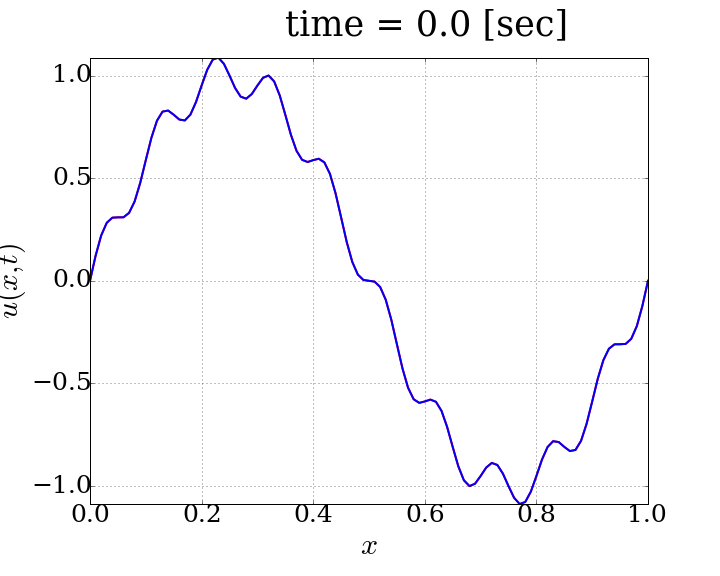
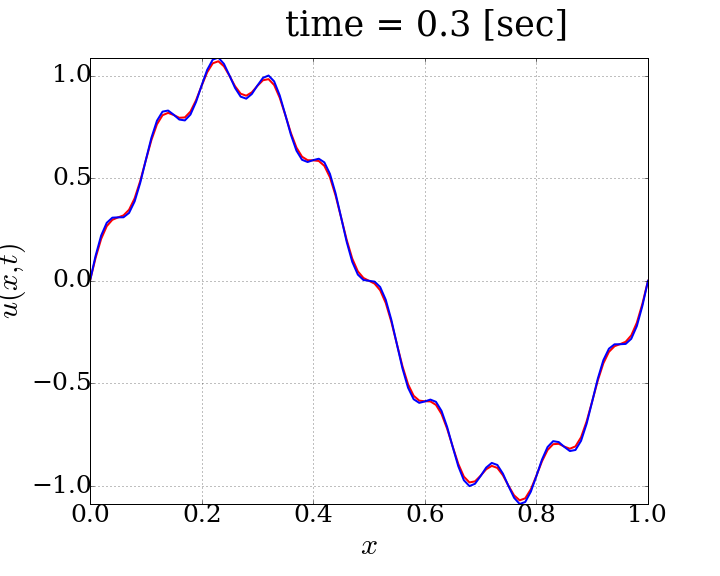
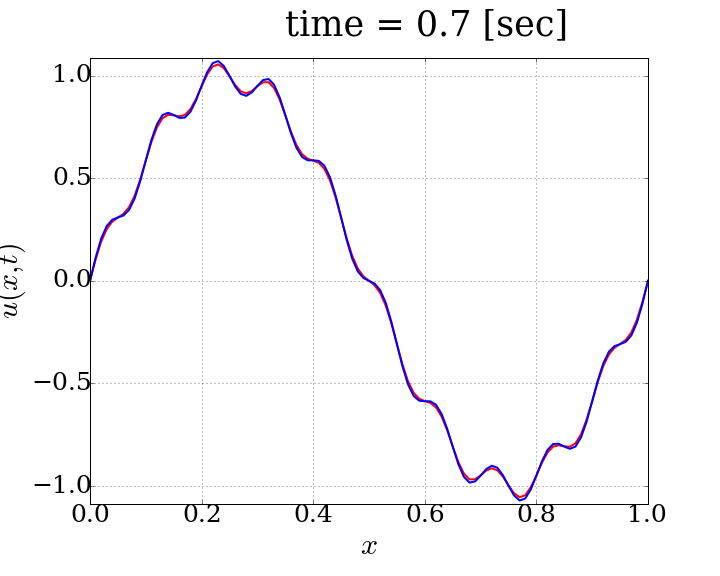
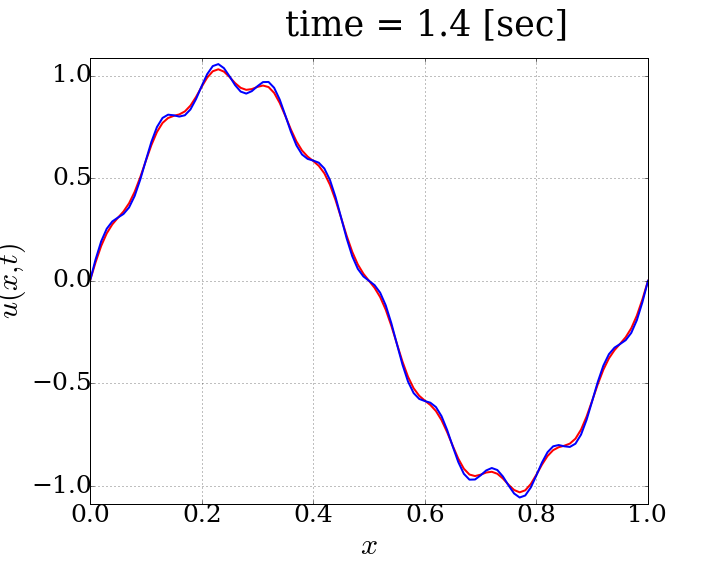
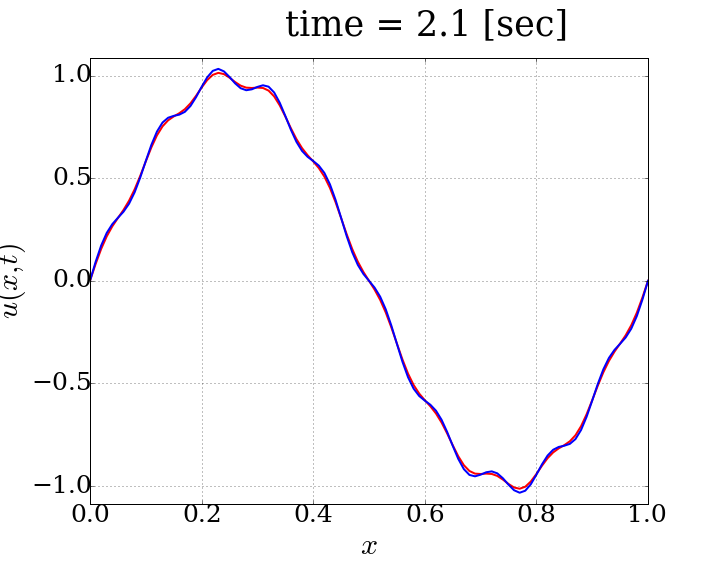
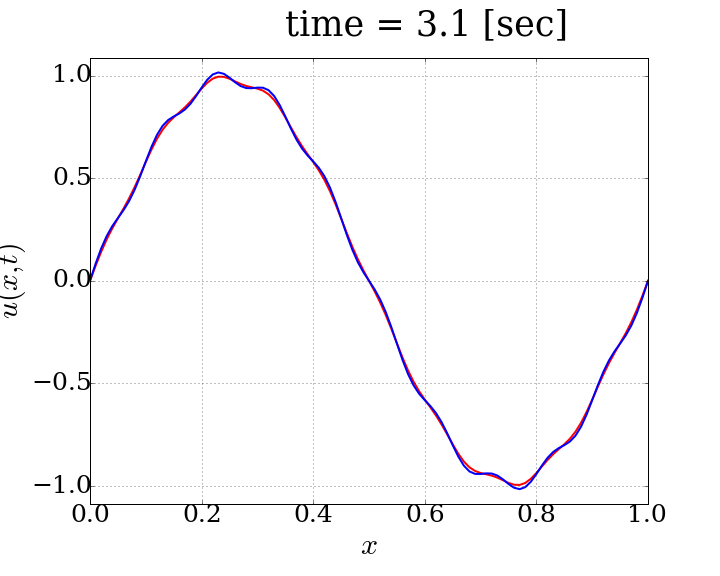
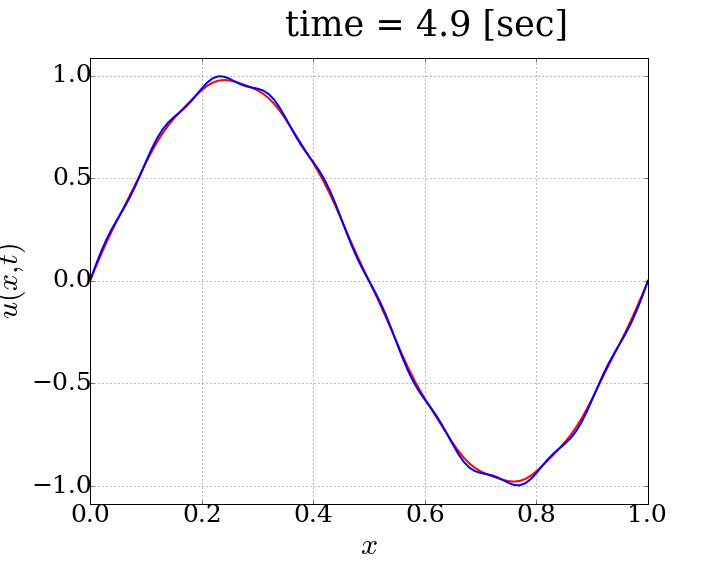
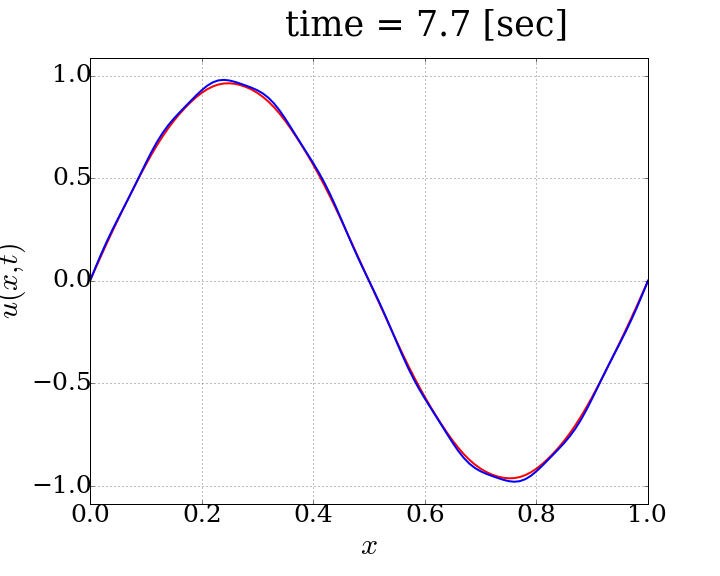
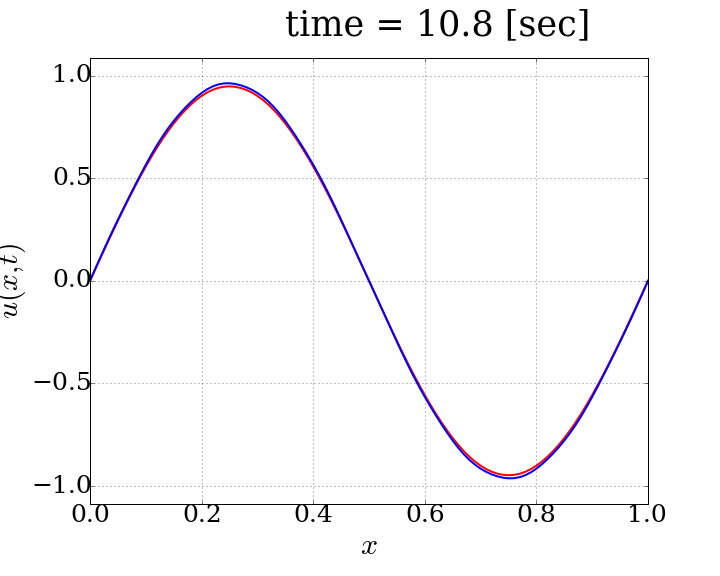
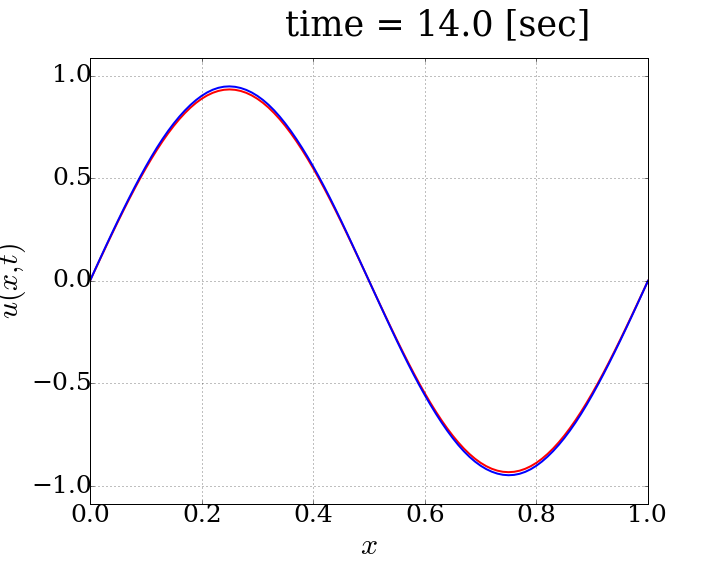
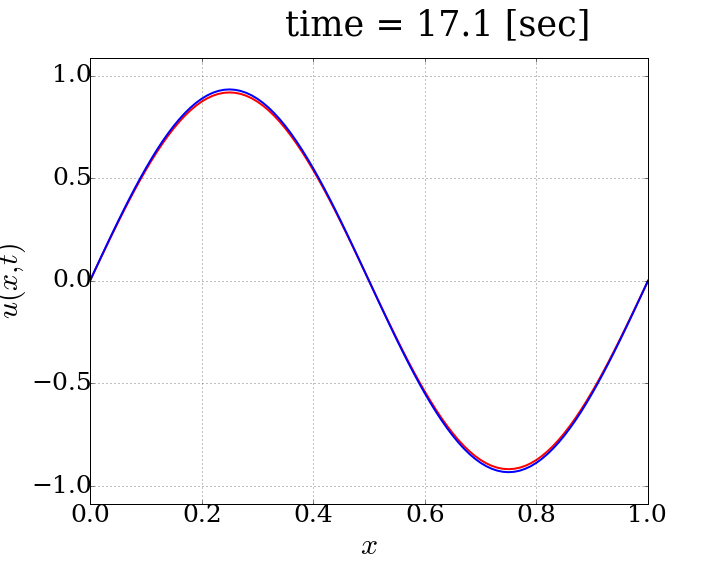
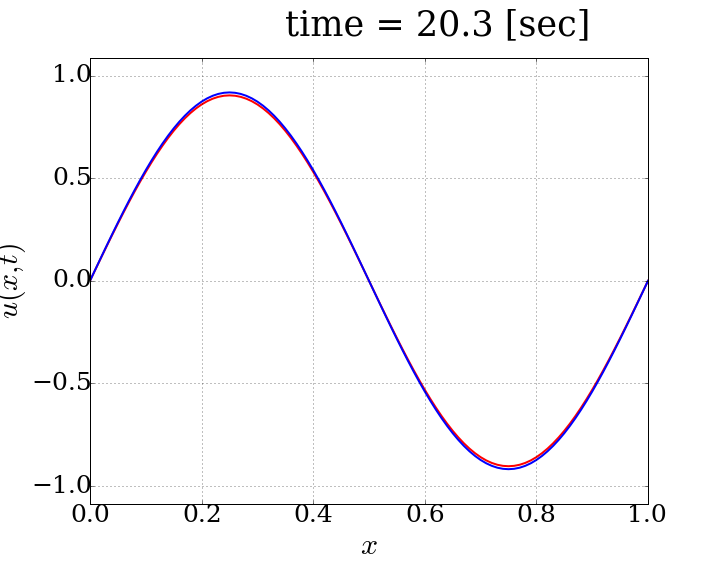
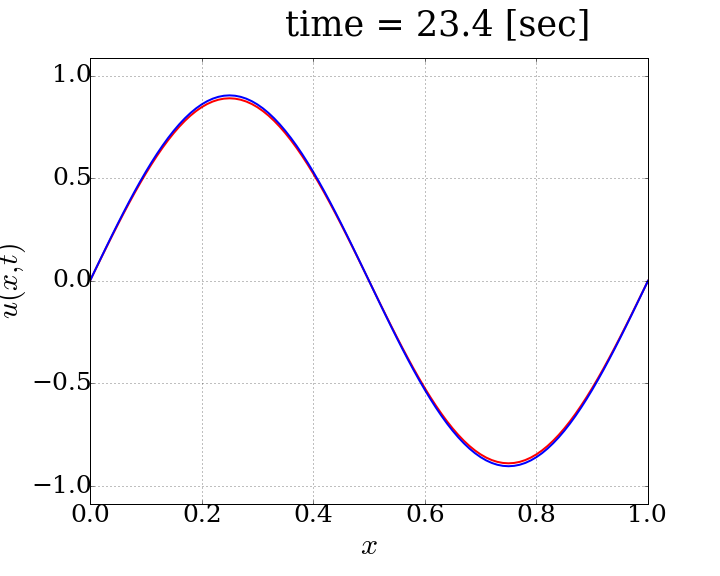
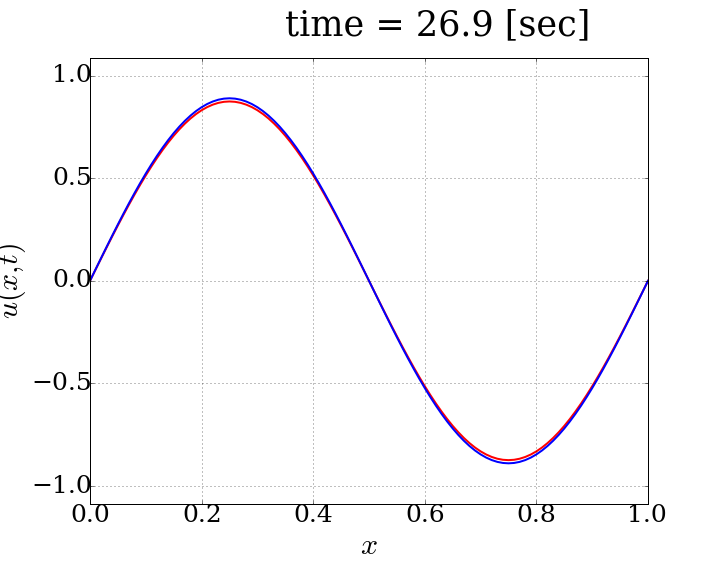
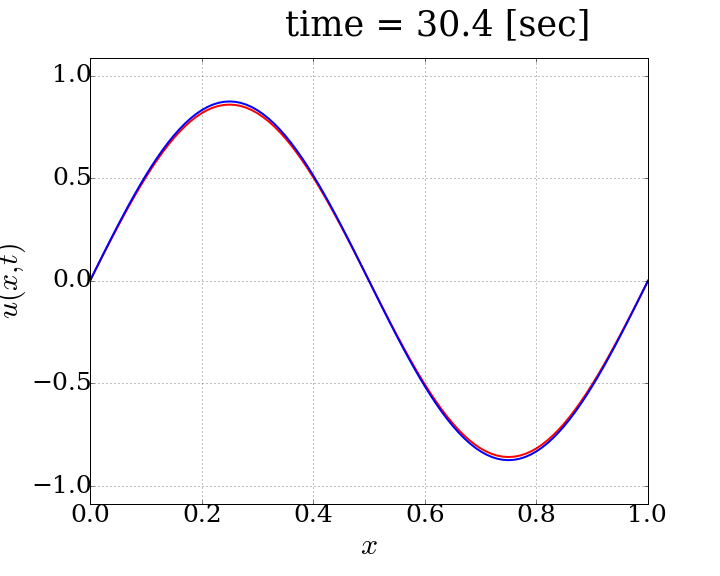
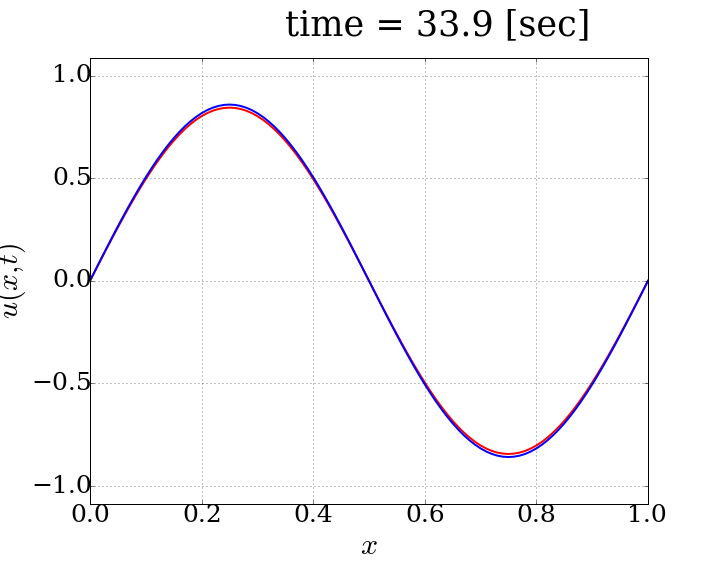
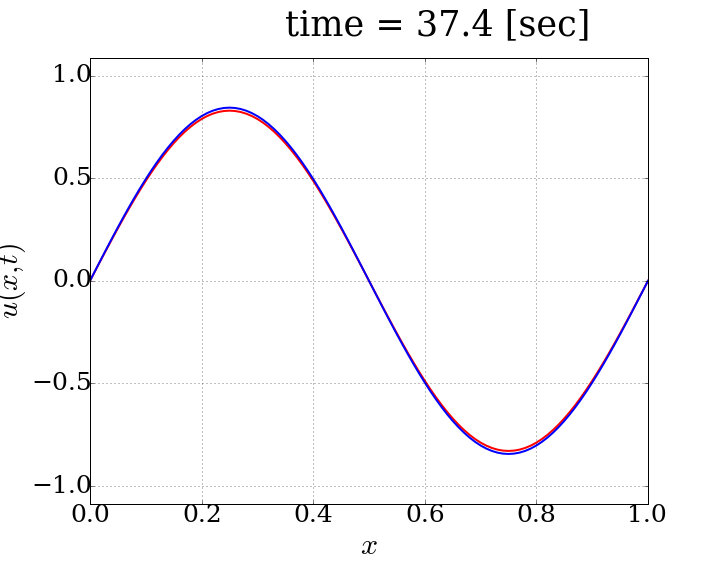
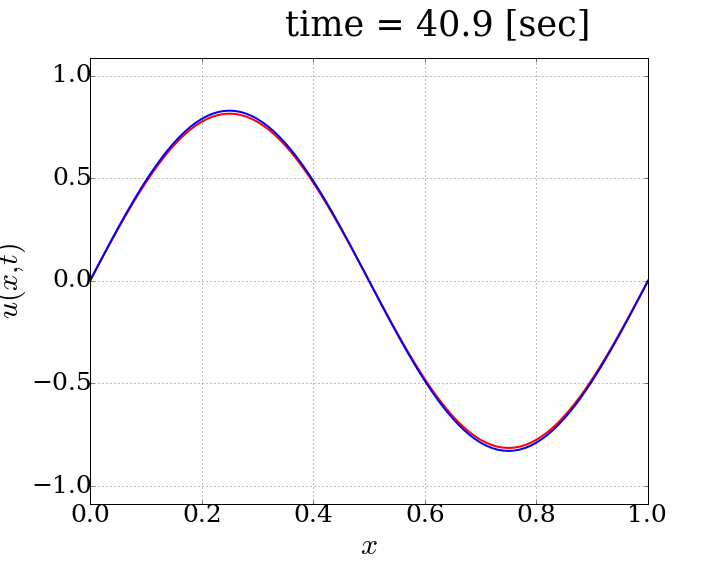
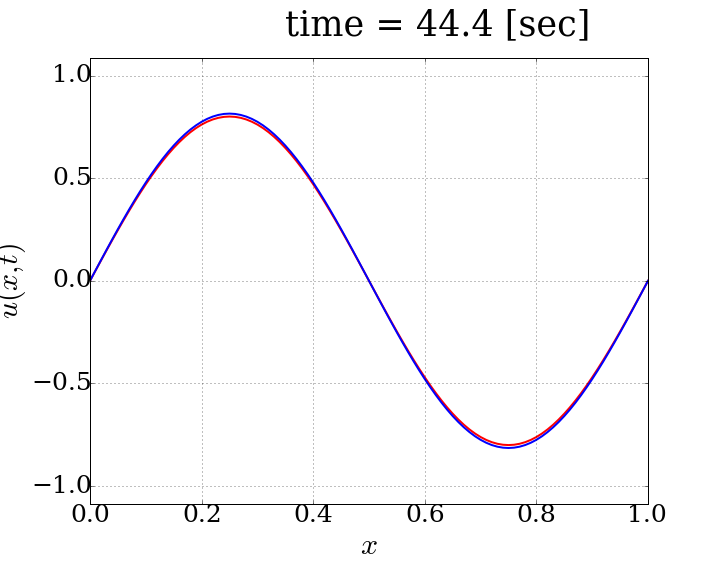
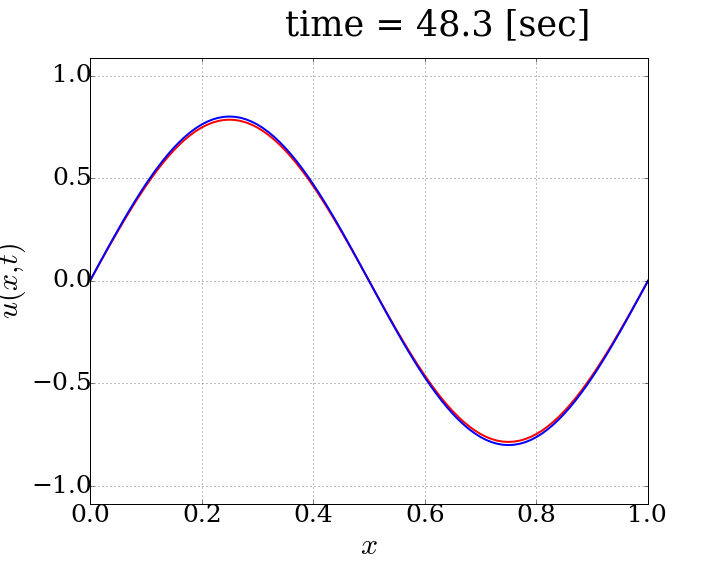
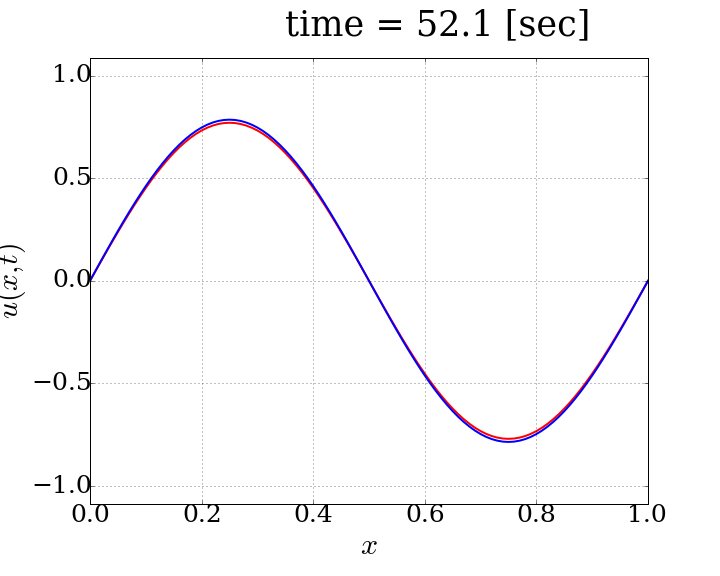
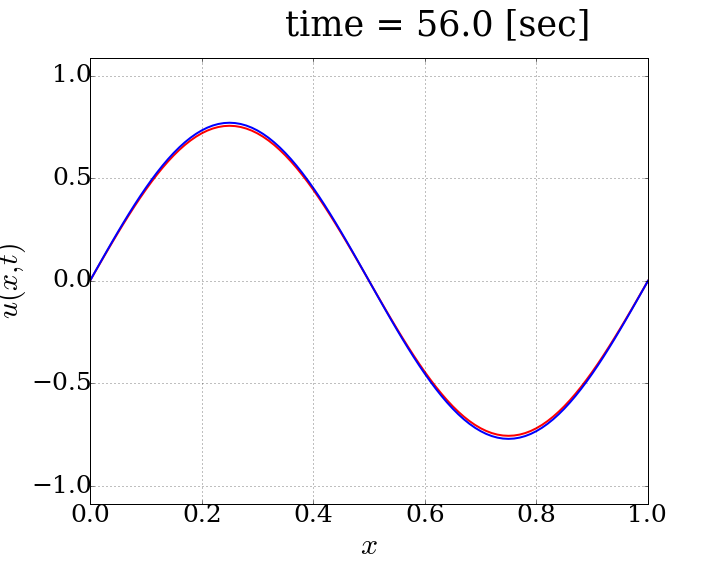
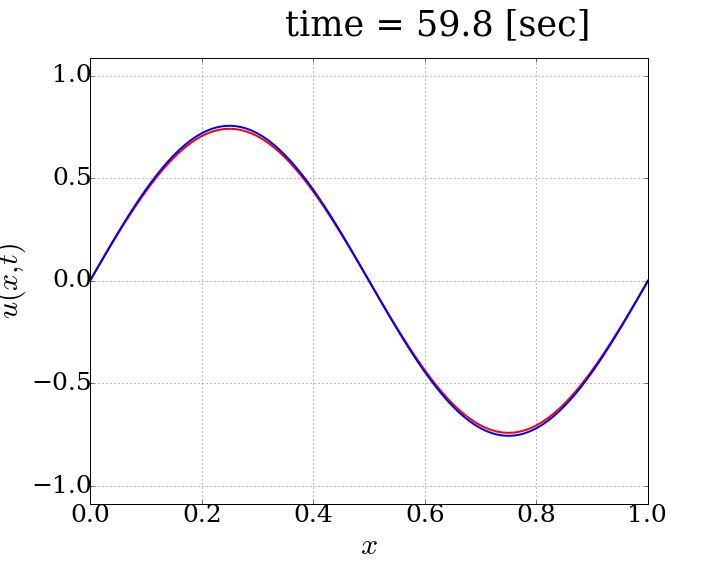
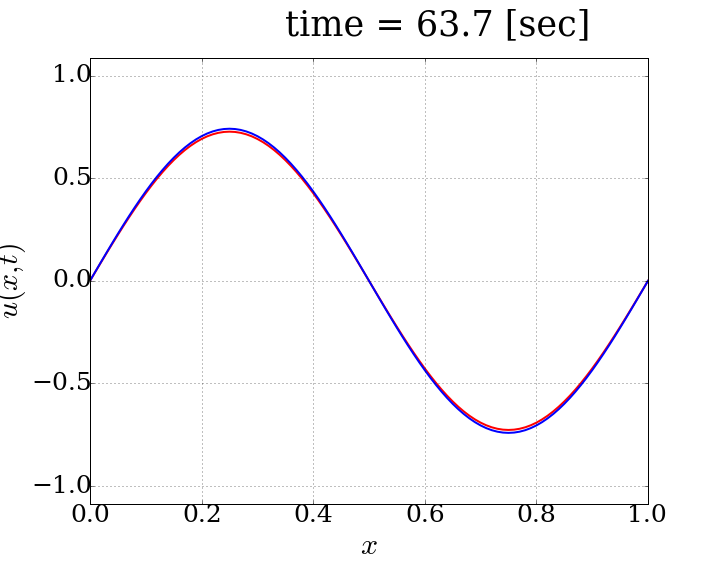
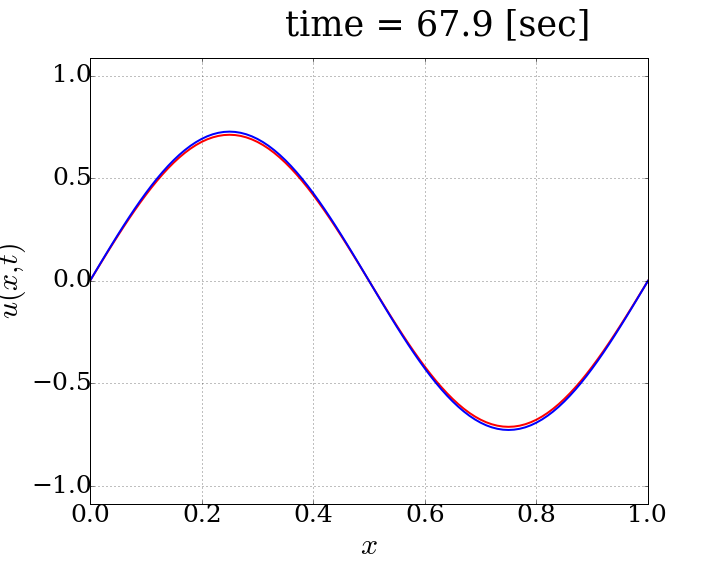
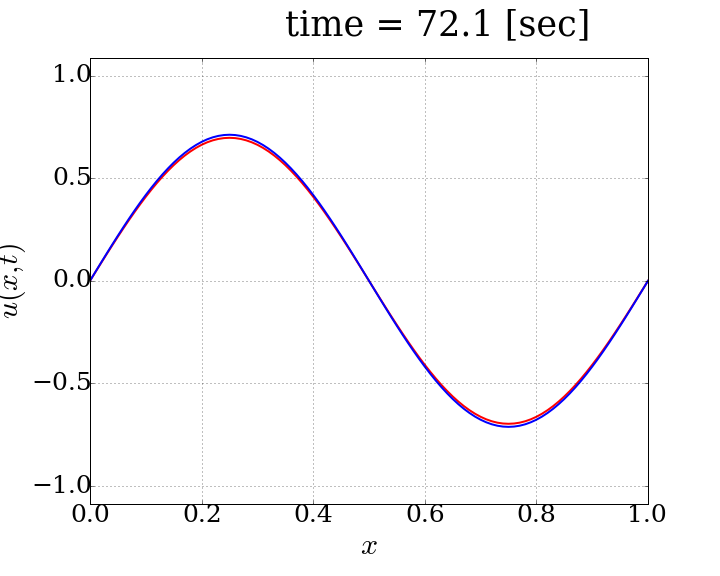
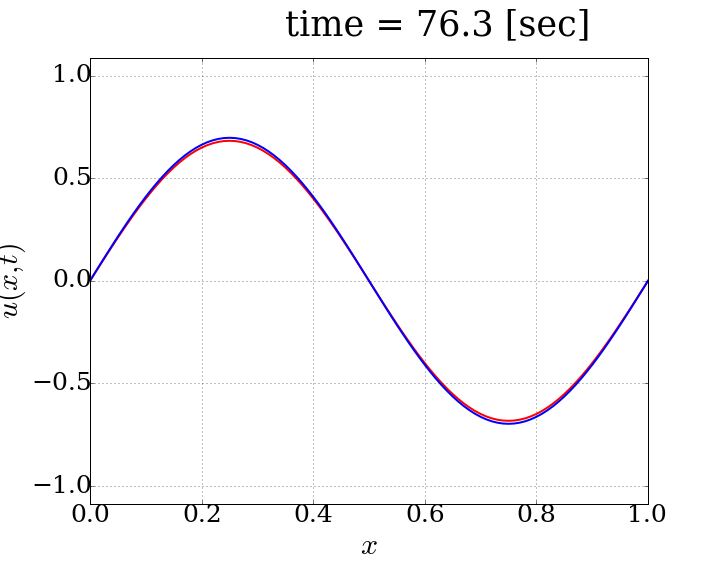
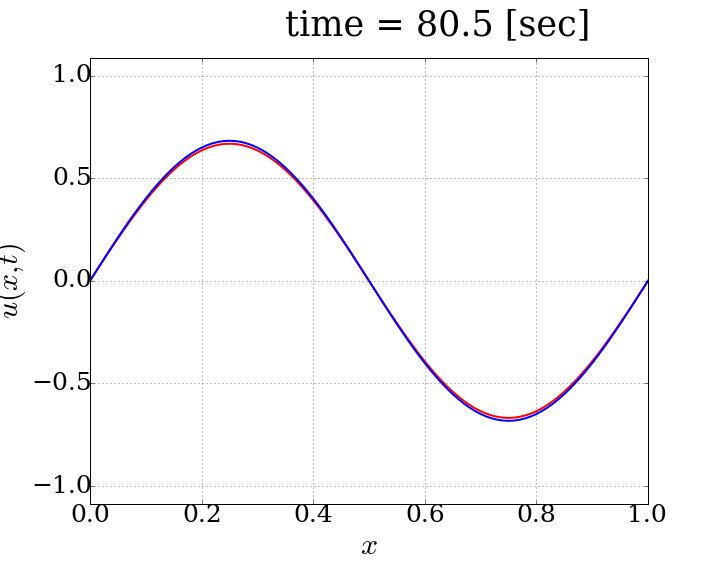
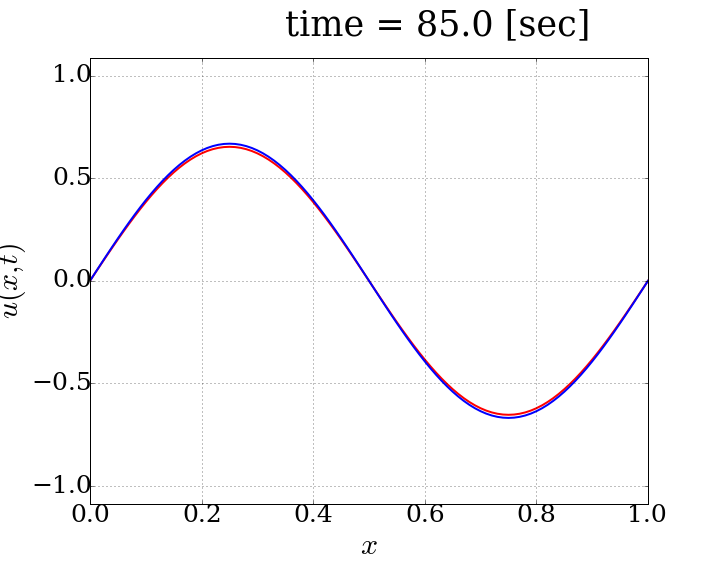
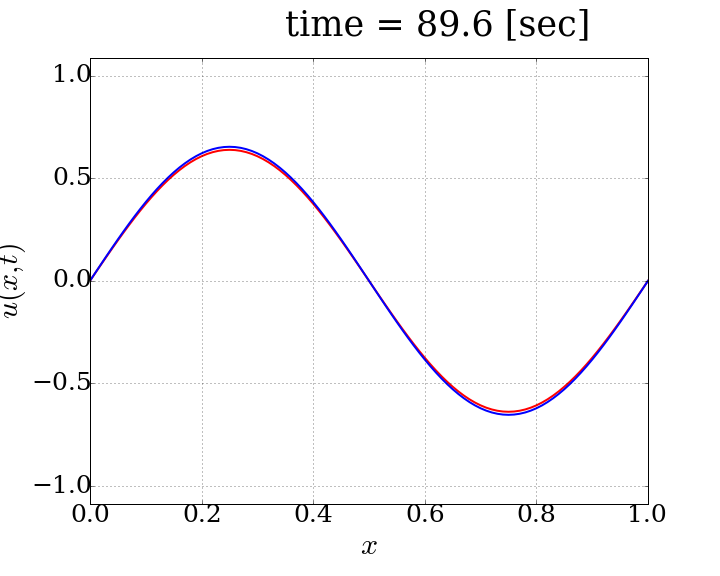
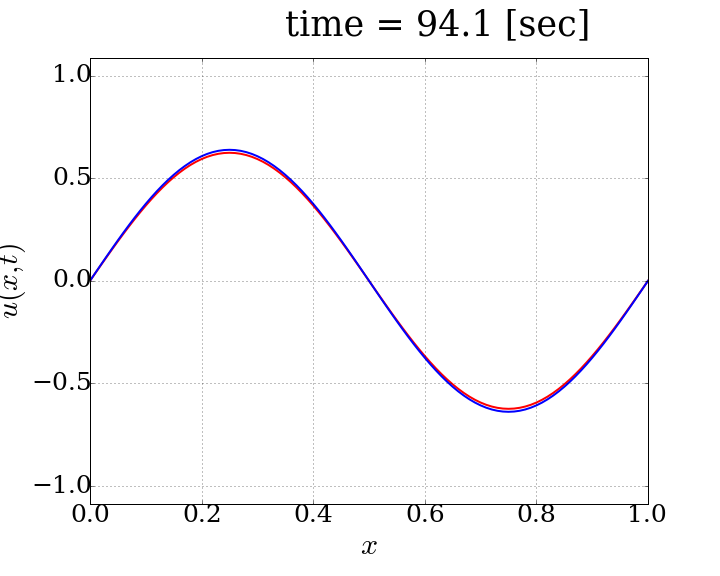
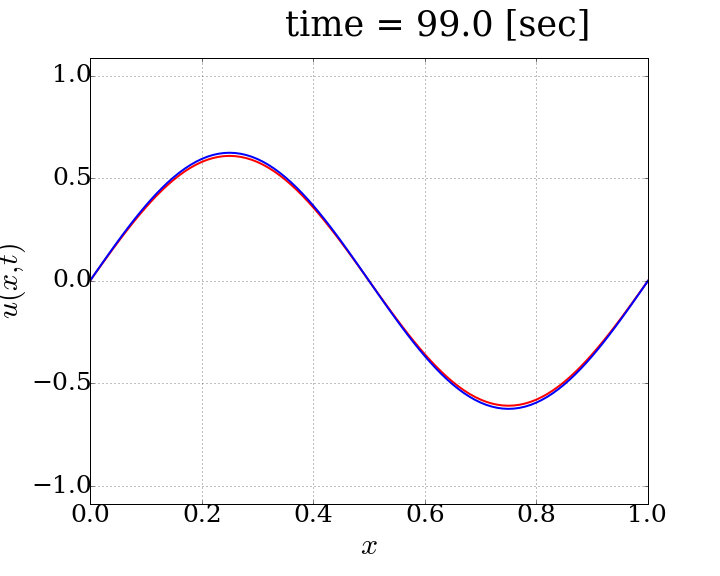
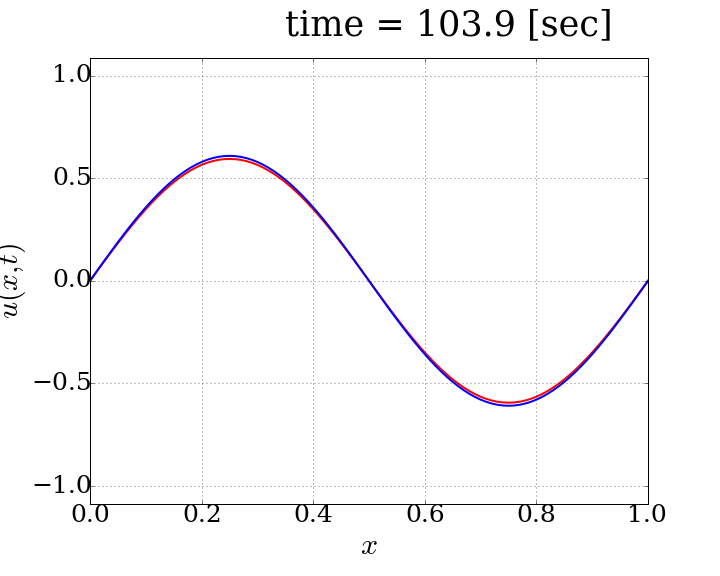
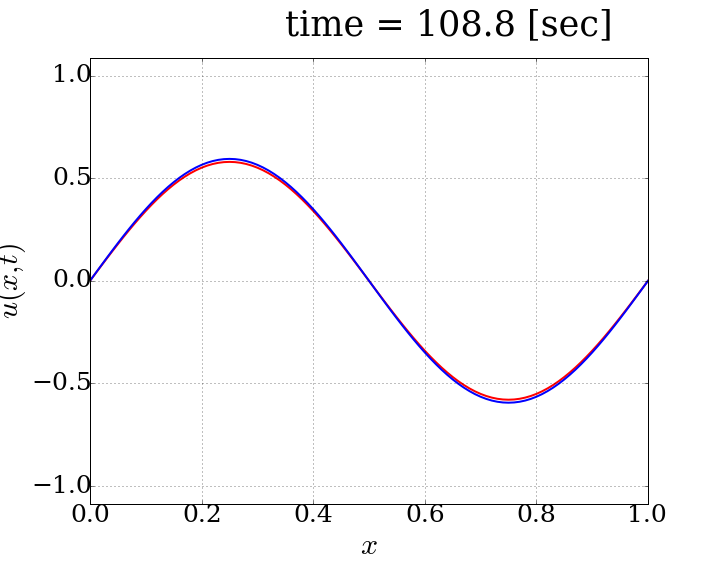
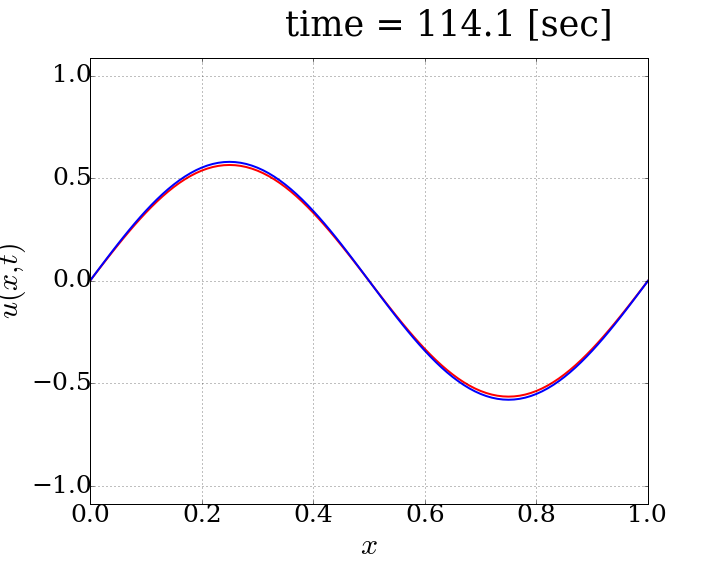
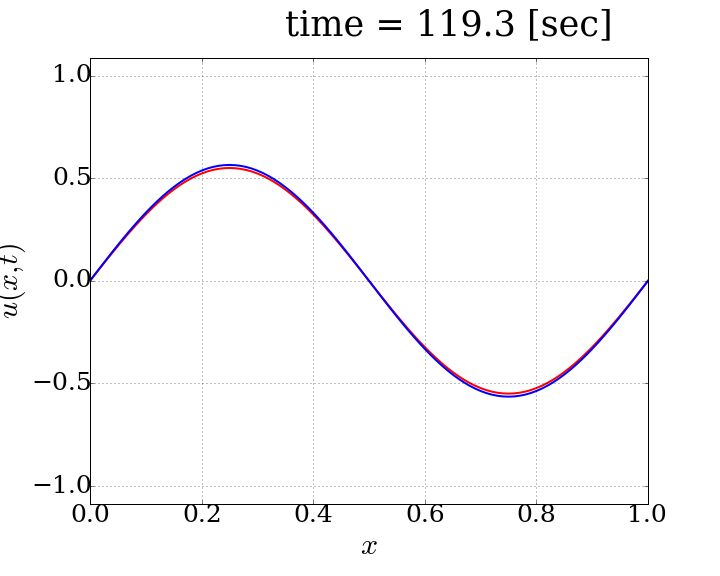
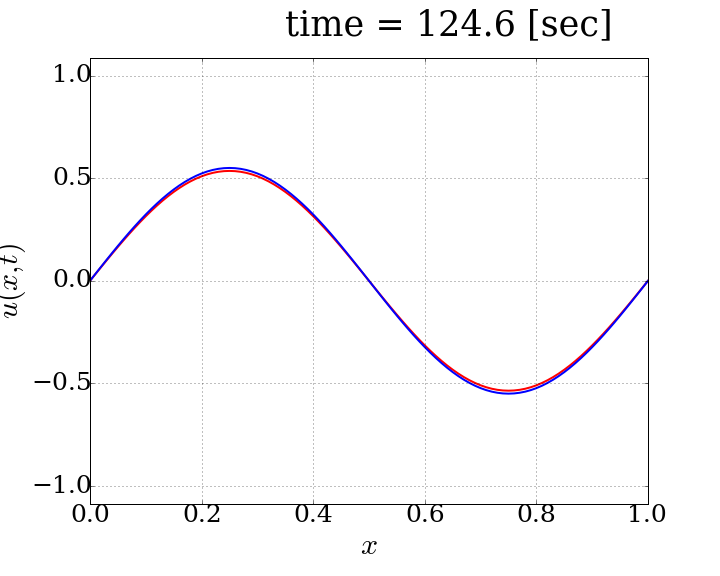
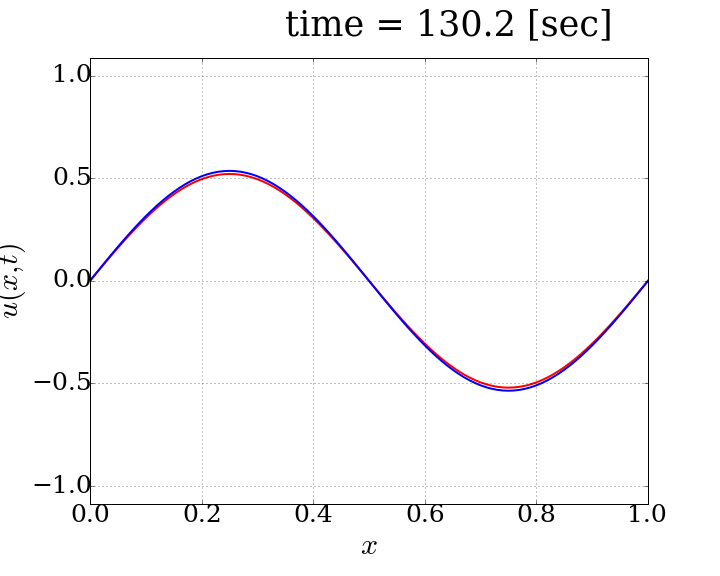
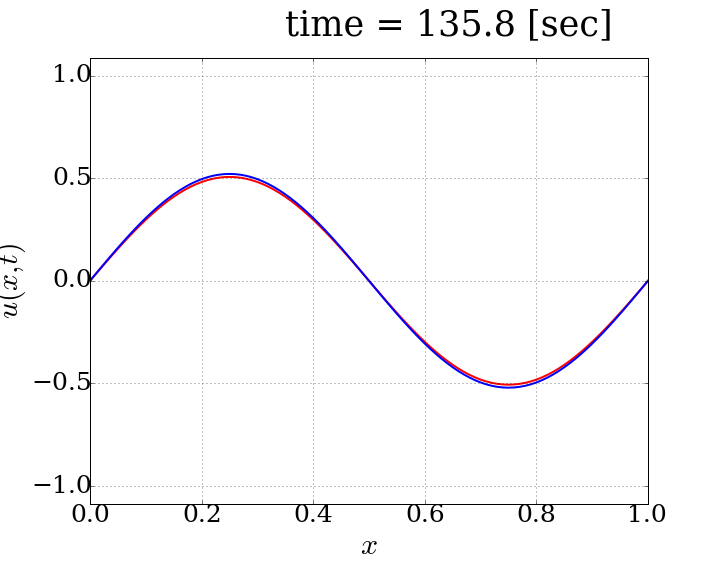
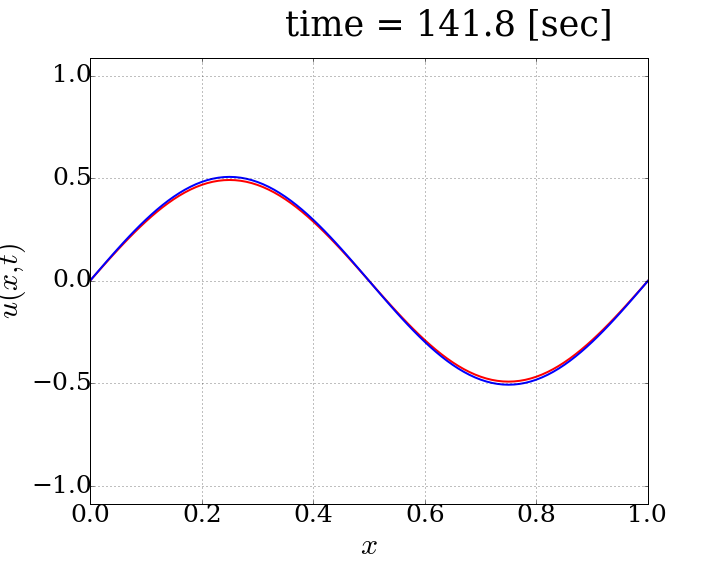
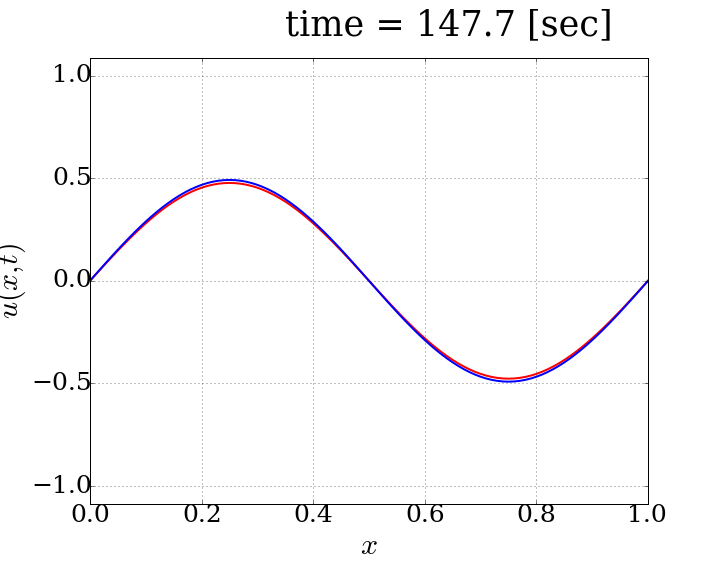
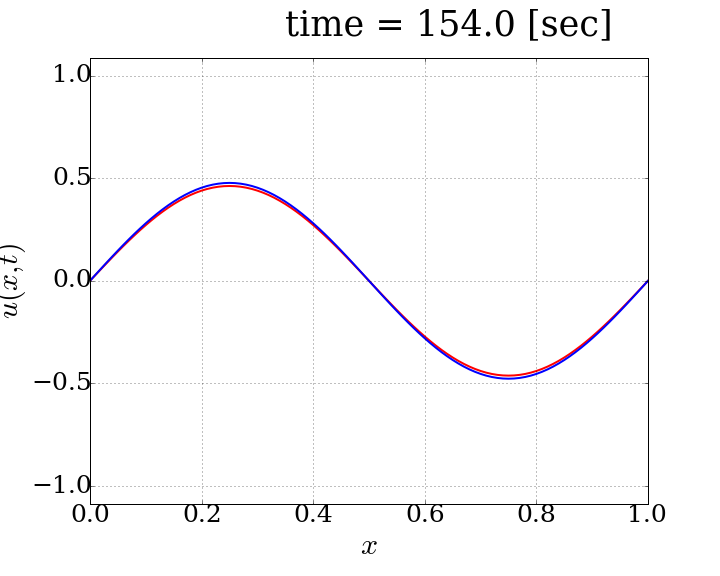
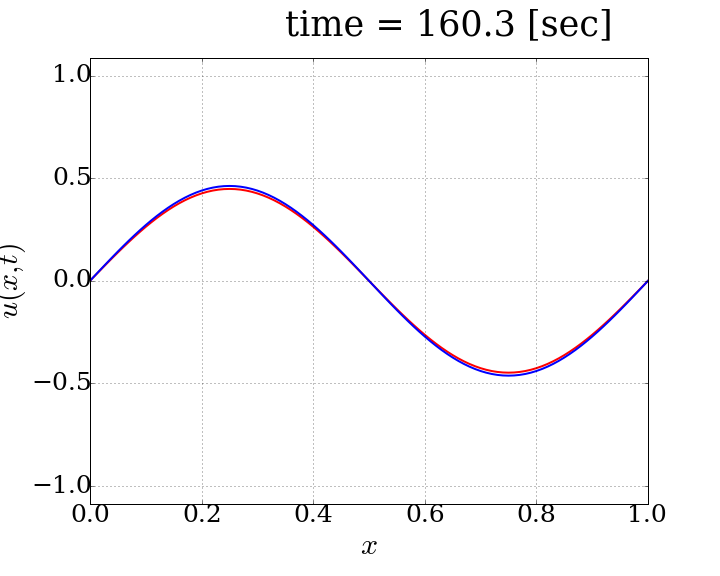
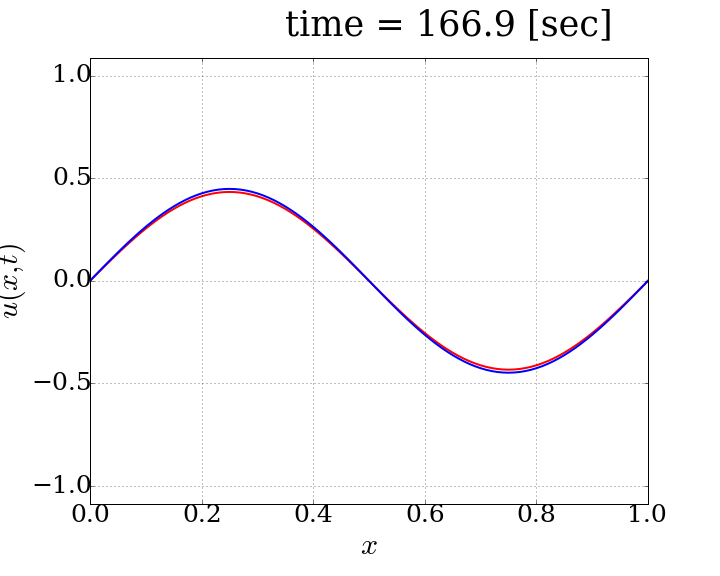
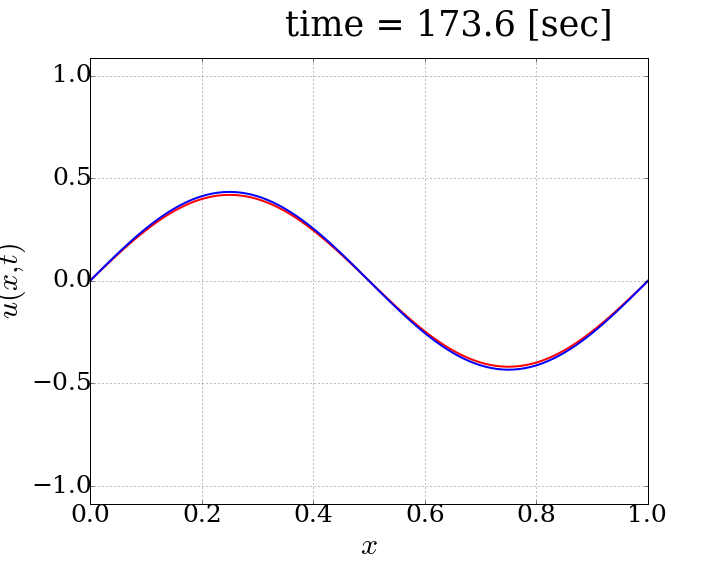
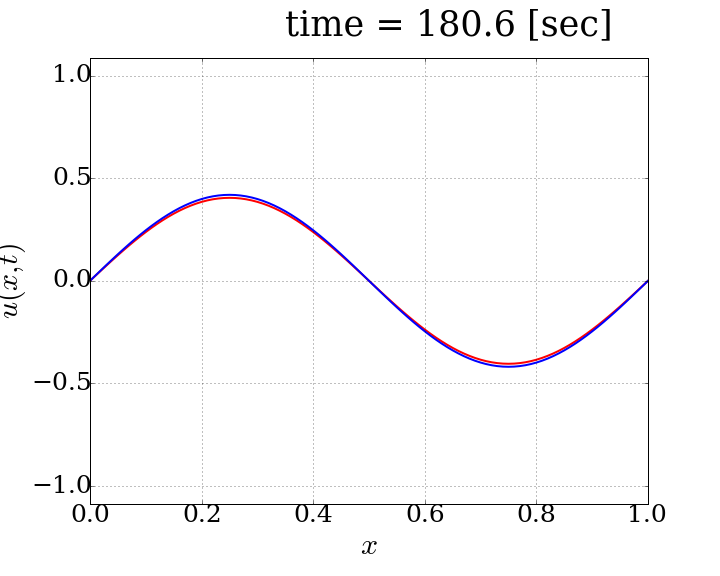
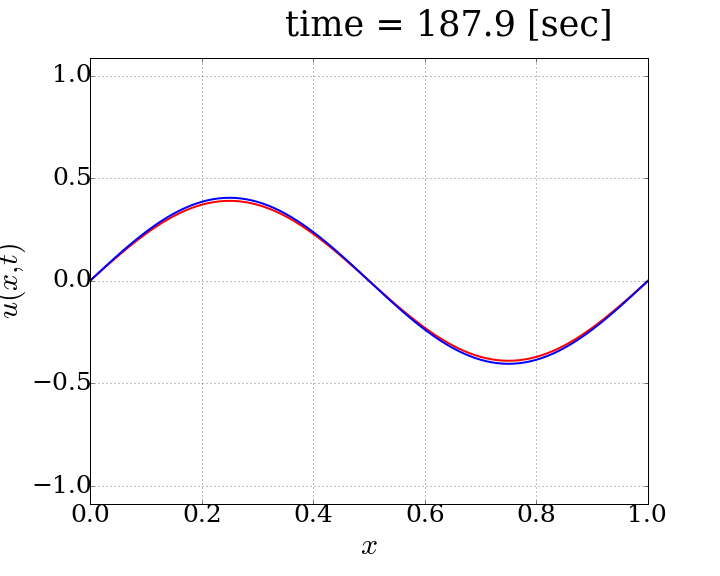
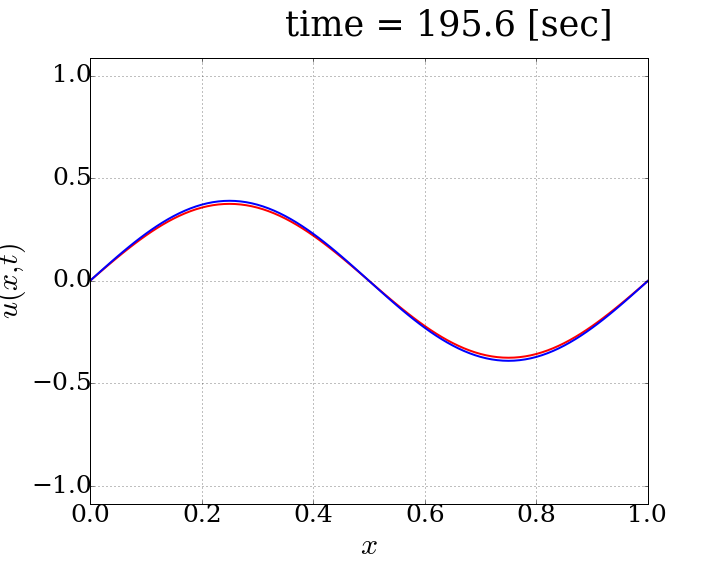
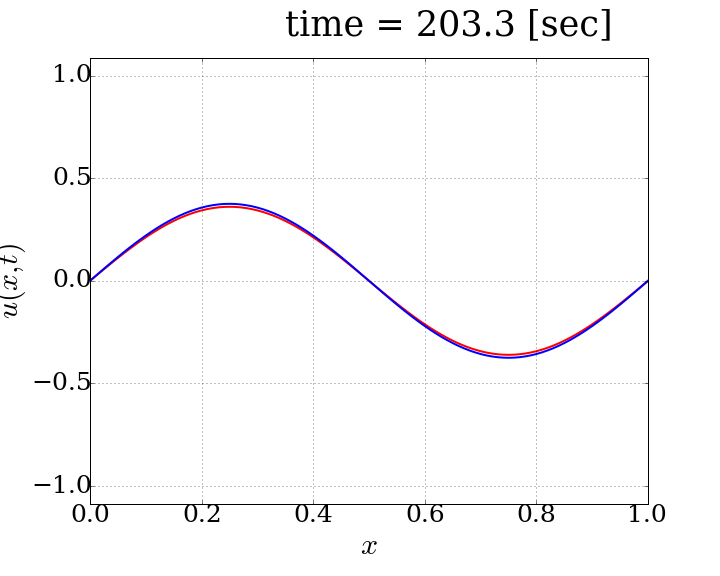
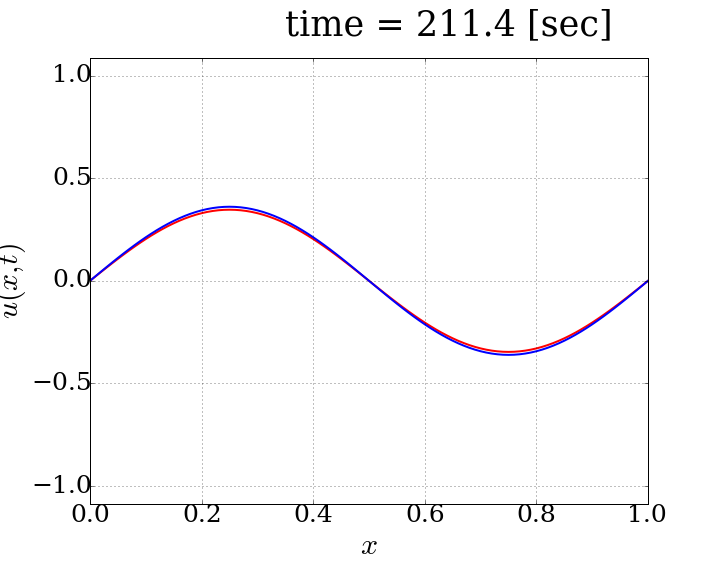
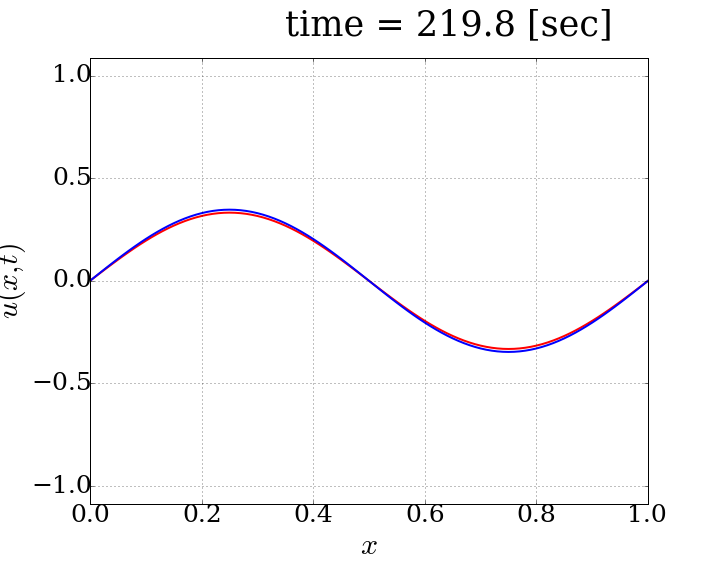
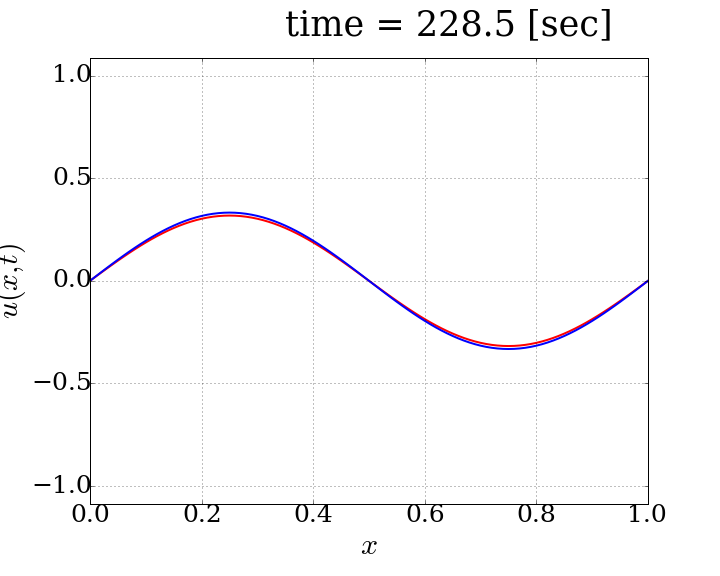
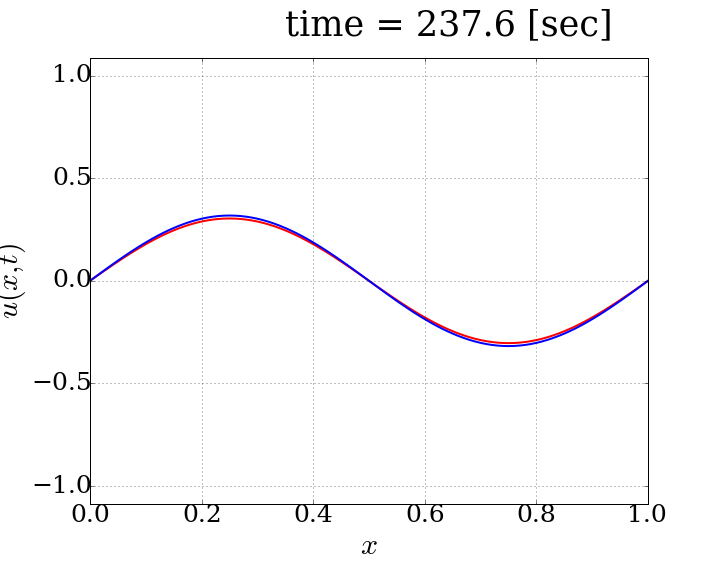
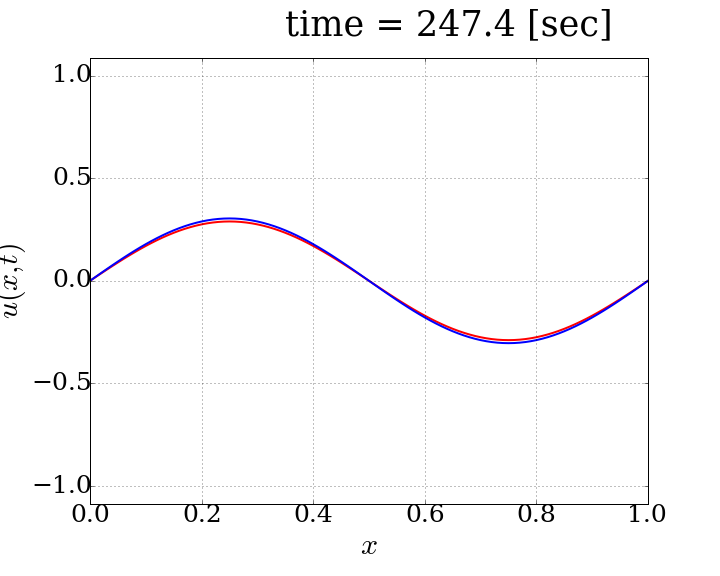
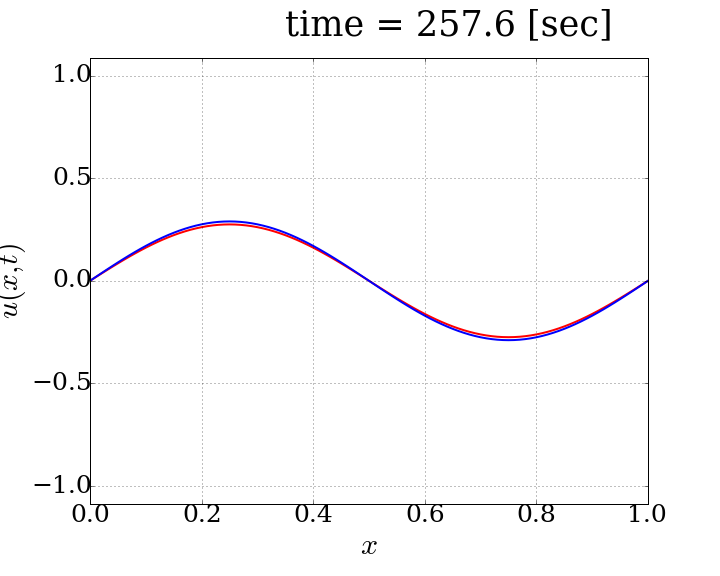
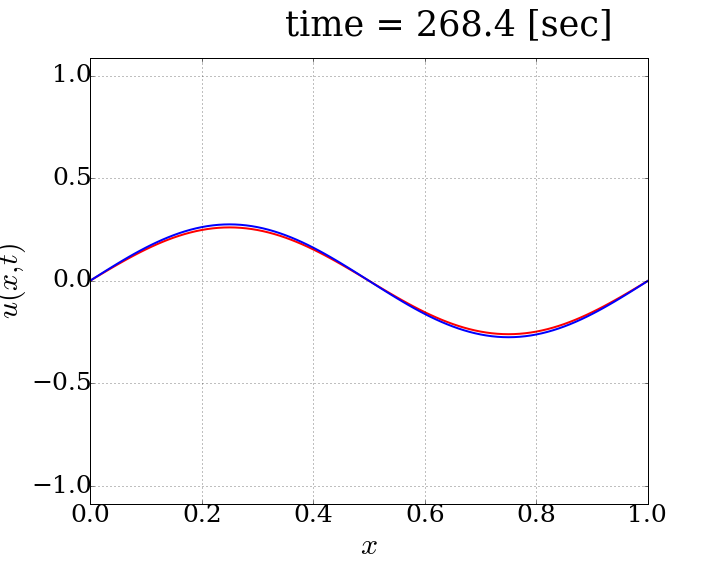
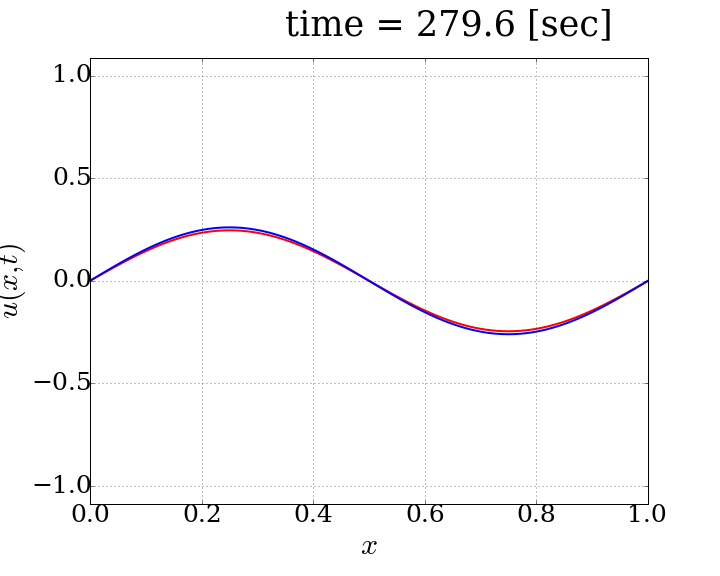
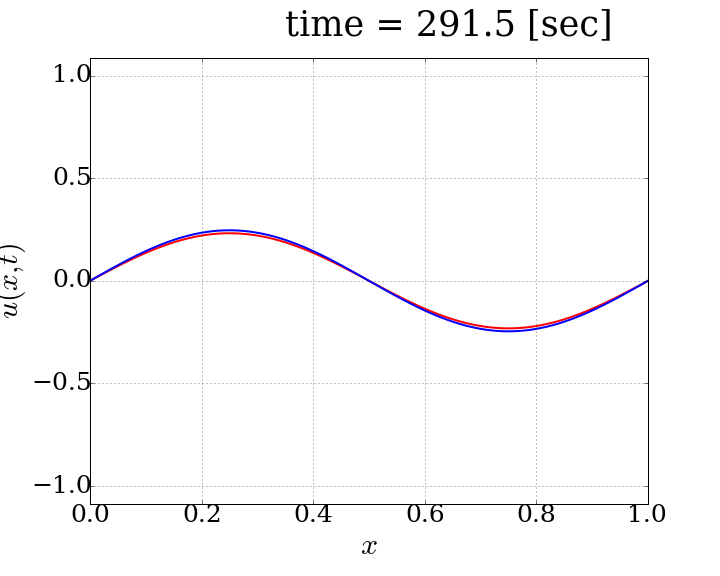
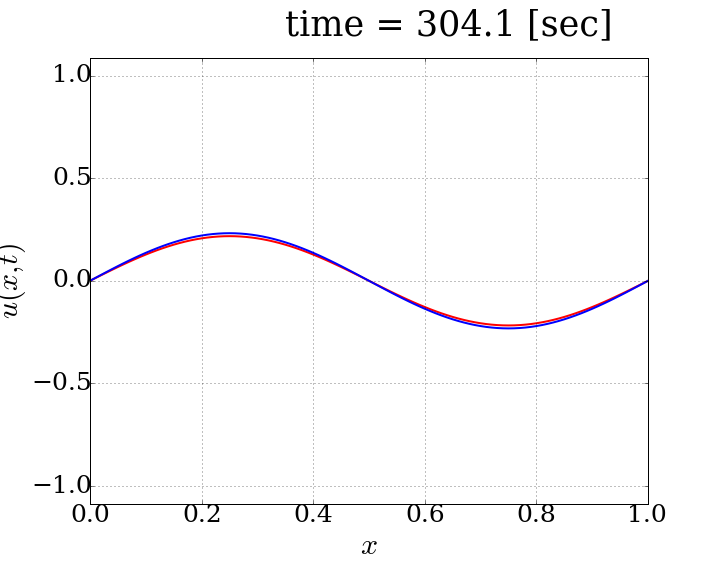
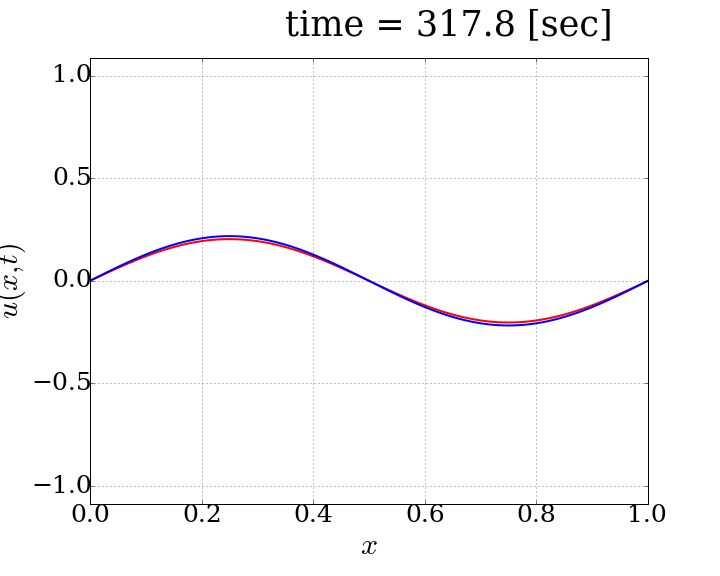
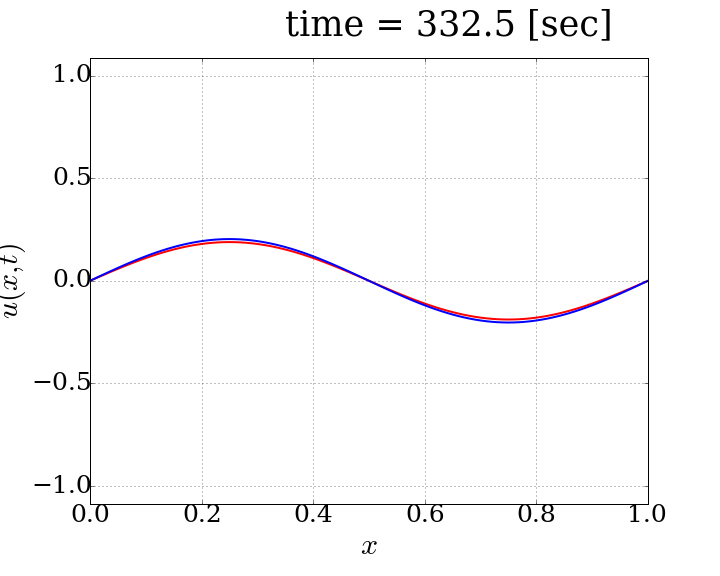
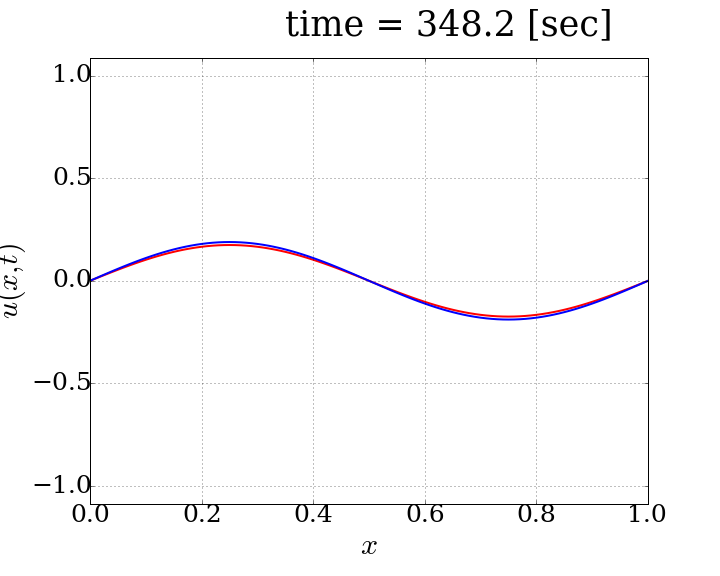
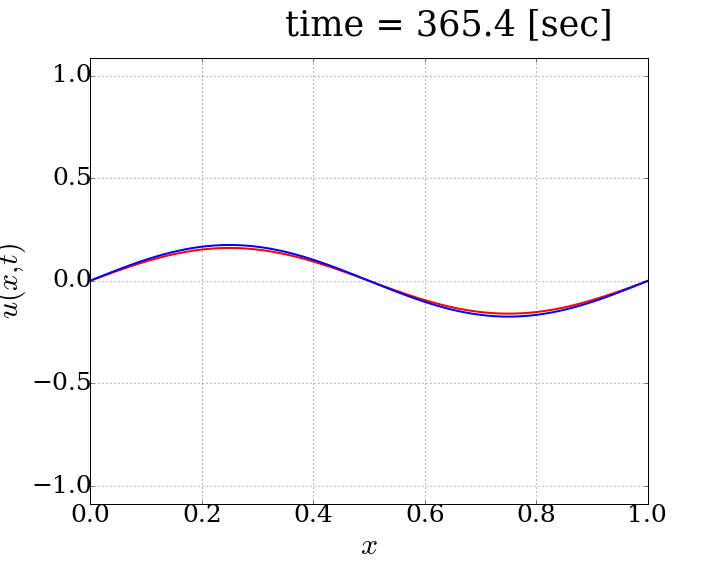
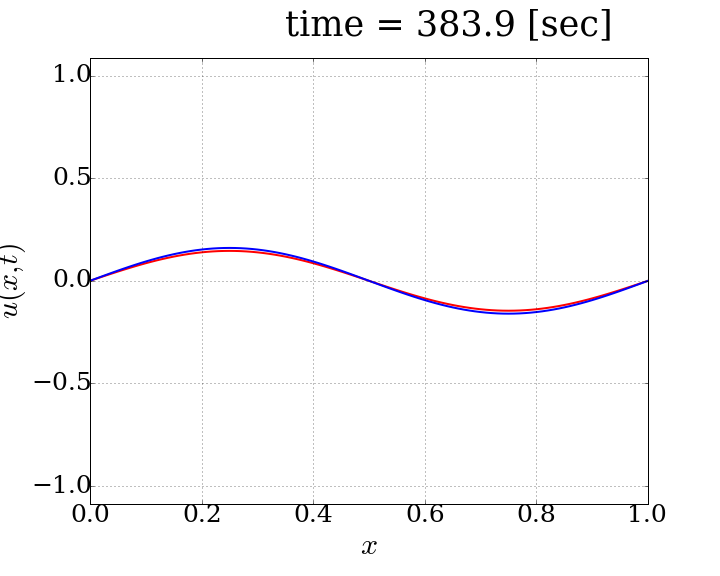
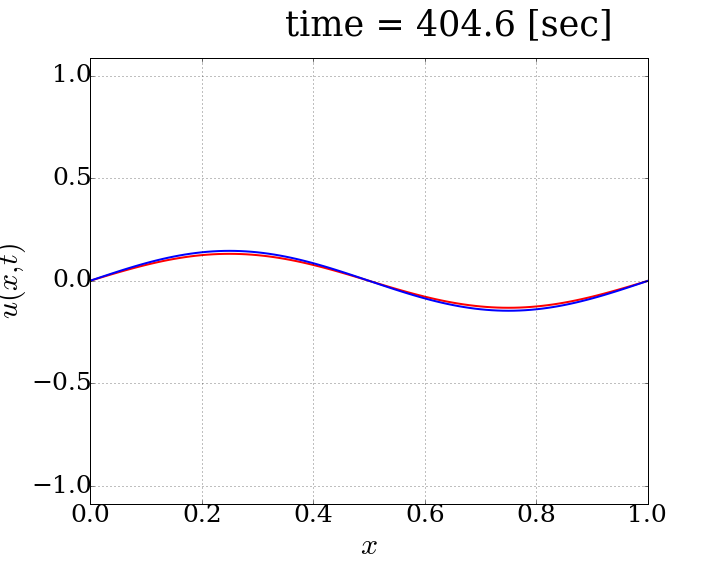
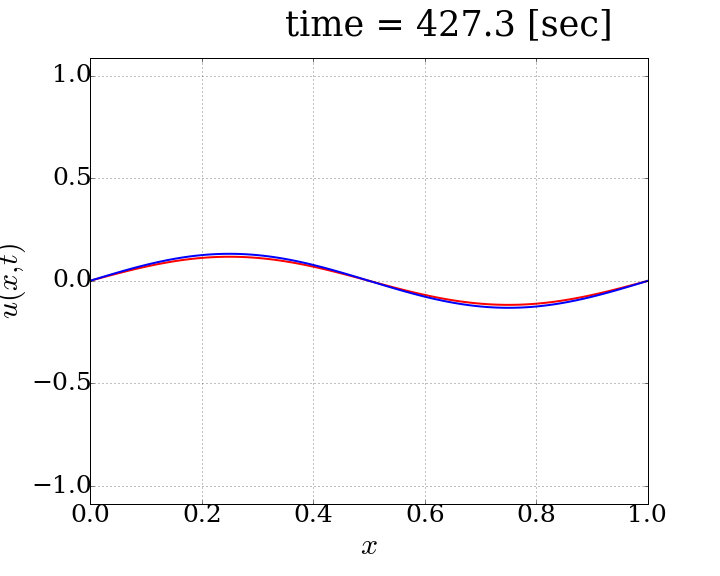
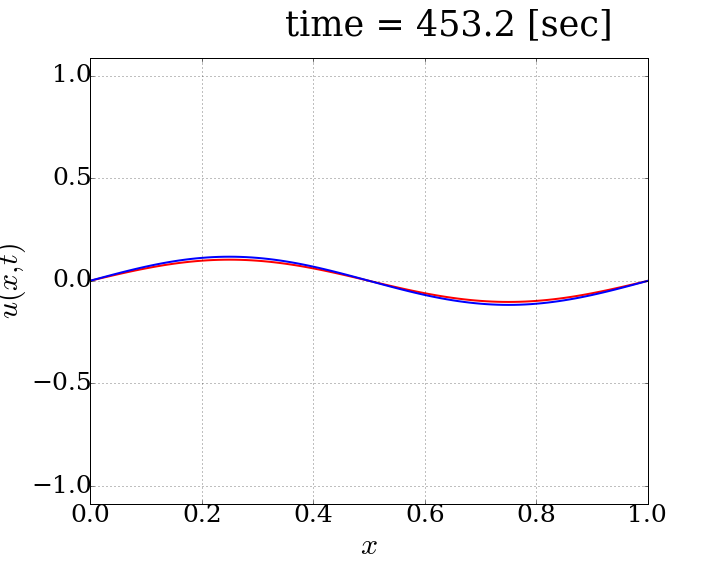
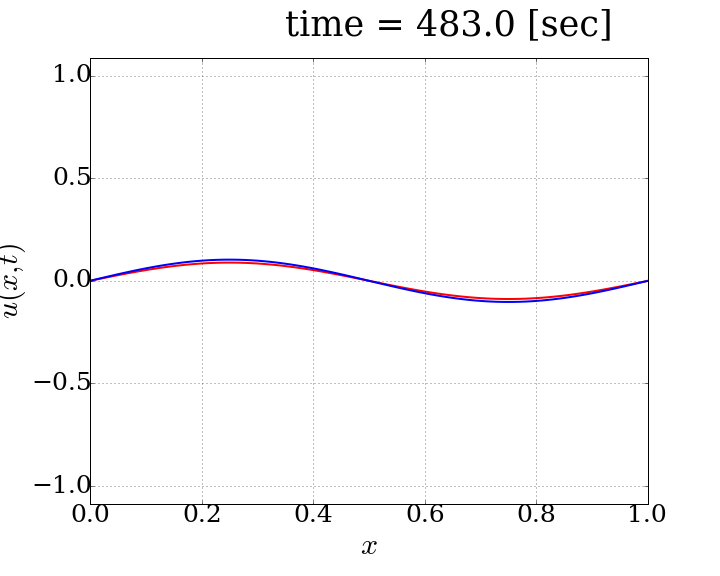
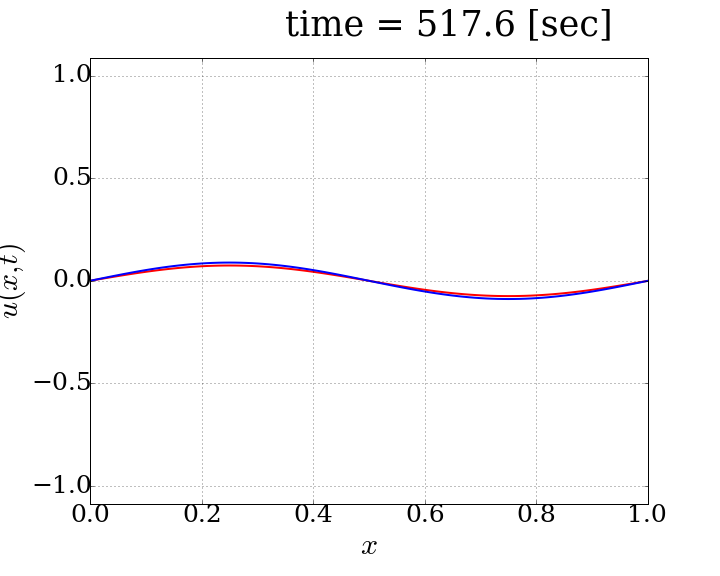
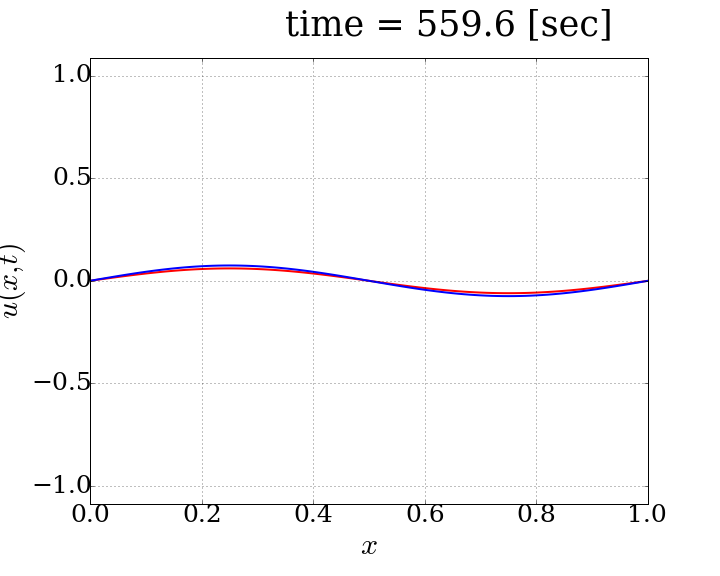
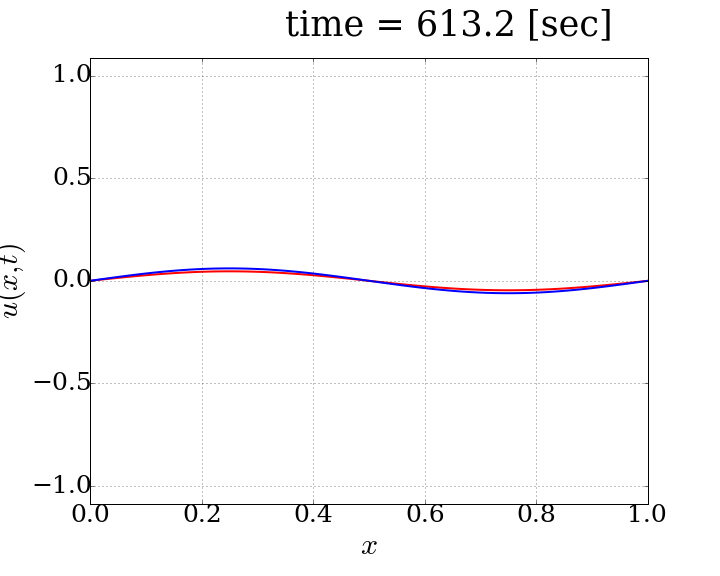
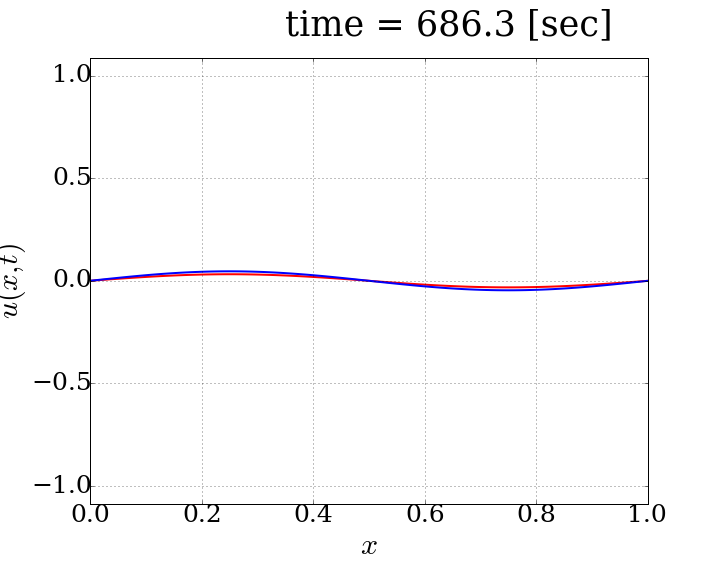

In [7]:
plt.rcParams['xtick.major.pad']='0'
plt.rcParams['ytick.major.pad']='0'
fig02 = plt.figure(1, figsize=(10, 8), dpi=90)
ax = plt.axes(xlim=(0, L), ylim=(min(u_sol[0]), max(u_sol[0])) )
ax.set_title("", fontsize=30, y=1.05)
ax.set_xlabel(r'$x$', fontsize=30)
ax.set_ylabel(r'$u(x,t)$', fontsize=30)
ax.grid()
time_text = ax.text(0.35, 1.05, '', transform=ax.transAxes)

colors = ['r', 'b']
numData2plt = 2
lines = [ax.plot([], [], lw=2, color=colors[j])[0] for j in range(numData2plt)]

def init():
    for line in lines:
        line.set_data([],[])
    time_text.set_text('')
    return lines, time_text

def animate(i):
    lines[0].set_data(x, u_sol_DS[i])
    lines[1].set_data(x, u_a[i])
    time_text.set_text('time = %.1f [sec]' % (times[i] * dt) )
    return lines, time_text

animation.FuncAnimation(fig02, animate, init_func=init,
                        frames=len(u_sol_DS), interval=50, blit=True)